In [1]:

#Exploratory Data Analysis Project ( EDA of Bank Data)

#The aim of the project is to predict if the client will subscribe (yes/no) to a term deposit. 

# age: age of a person
# job: type of job
# marital: marital status
# education
# default: has credit in default? ('no','yes','unknown')
# balance: average yearly balance
# housing: has housing loan? ('no','yes','unknown')
# loan: has personal loanduration ? ('no','yes','unknown')
# contact: contact communication type ('cellular','telephone')
# day: The day of the month when the contact was last made. 
# month: The month of the year when the last contact was made.
# duration: The duration of the last contact in seconds.
# campaign: The number of contacts performed during the campaign for the individual.
# pdays: The number of days that passed after the last contact from a previous campaign. A value of -1 indicates that the 
# individual was not previously contacted.
# previous: The number of contacts performed before this campaign for the individual.
# poutcome: The outcome of the previous marketting campaign (e.g. success, failure, others)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import mode, zscore, iqr


In [3]:
df = pd.read_csv(r"Bank Data.csv")

In [4]:
# summary of statistics and data distribution for each numerical column (by default) in the DataFrame.
# STD is for sample of dataset, while other statistics are for whole dataset(population)

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [6]:
# Visualizations and insights of different fields/columns with respect to Target Field(Deposit)
# Steps for Data Analysis: Use Value_counts for quick exploring categorical distribution. Helps analyzing the frequency of values in a column. 
# Value_counts - Identifies the unique values in a DataFrame column. and helps you to identify whether the data is biased or skewed. 
# Value_counts - helps to decide whether the field is categorical or continuous. 

In [7]:
df.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [8]:
df.age.value_counts()

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64

In [9]:
# KPI 1: Analysis of Age vs Deposit. 
# Age is Continuous and Deposit is categorical
# Boxplot  -- used for one categorical and one continuous variable


<Axes: xlabel='deposit', ylabel='age'>

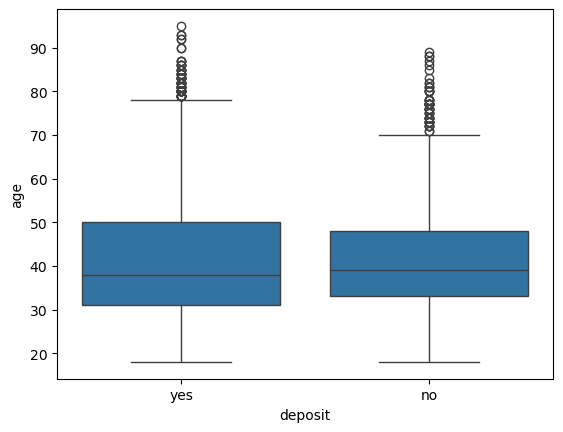

In [10]:
sns.boxplot(x = 'deposit', y = 'age', data = df)

In [11]:
# Insights : 
# The IQR Age for people opting for 'Yes' is higher than the those opting 'No' for Deposit. 
# This means bulk data for people with age IQR (between 3o to 50 years) have more probability to choose Deposit scheme. 

# The min age from the dataset for opting 'Yes' as well as 'No' is similar ( slighly below 20. The min age of Dataset is recorded as 18) 

# The max age for opting Yes is higher than those chosing No. 
# This means, the older population have more tendency to opt 'Yes', maybe post-retirement, they get free of liabilities & deposit can give peace of finance planning

# There are outliers in both categories. But outliers in the 'No' category are more. 
# This means, there are more extreme datapoints in 'No' category. However, the outlier age value for 'Yes' population is quite high(above 90)

# The median age of people opting for 'Yes' is below 40, while median age for people chosing 'No' is around 40+

# Overall, there is not much distinction in age ranges in population choosing for 'Yes' or 'No'. Both are similar
# We can't draw specific conclusions around the age and recommend focus on specific age group for Campaign Success.

<Axes: xlabel='deposit', ylabel='age'>

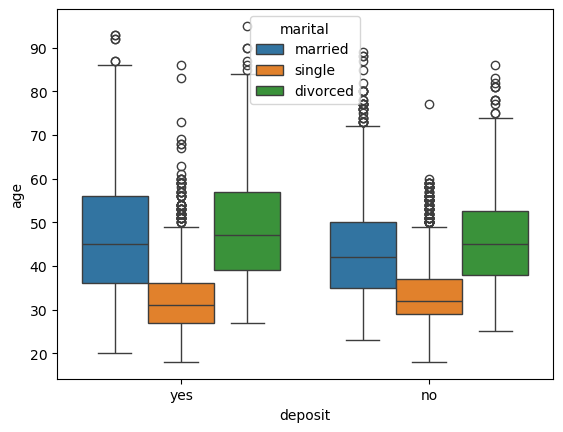

In [12]:
# Differentiating the population by marital status, using hue() function.

sns.boxplot(x = 'deposit', y = 'age', hue = 'marital', data = df)

In [13]:
# Insights : 
# While comparing the marital status of population individually, we can see there are more people opting for 'Yes' in each category.

# The distribution of outlier datapoints among singles chosing 'Yes' is higher than those chosing 'No'

# The min age value for married people chosing 'Yes' is lower than opting 'No'. 
# This tells, the young married people are more inclined towards the Deposit scheme.

# The max age among the married and divorced people choosing 'Yes' is higher than opting 'No'. 
# This means, aged people have more tendency to chose Deposit Scheme.

In [14]:
# KPI 2: Analysis of Job vs Deposit. 
# Job is categorical and Deposit is categorical
# Countplot  -- used for two categorical variable

In [15]:
df.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [16]:
# The distribution of job shows the bulk of data is among management, blue-collar, technician and admin job sector
# The population in job categories like self-employed, student, unemployed, entrepreneur, housemaid, or unknown is relatively low.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

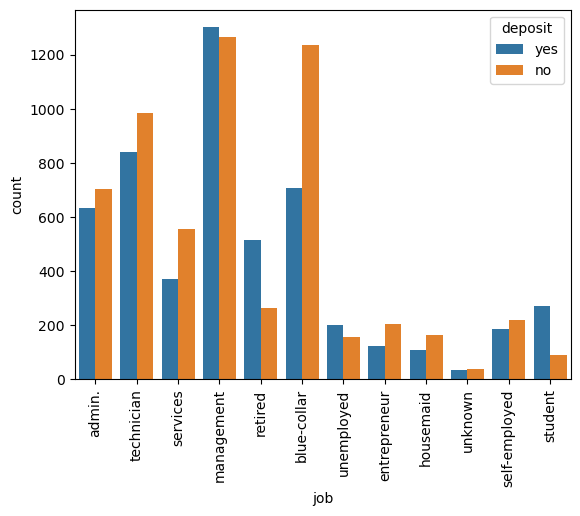

In [17]:
sns.countplot(x = 'job', hue = 'deposit', data = df)

plt.xticks(rotation=90)  # Rotate the x-axis labels to display them vertically

In [18]:
# Insights : 
# The overall population in job categories like self-employed, student, unemployed, entrepreneur, housemaid, or unknown is relatively low.
# Among small-income population like self-employed, housemaids or enterpreneurs or unknown: people chosing 'No' are higher than 'Yes'.
# These people may not prefer deposit for reasons : maybe low cash flow and not enough fund to save & deposit. 
# Enterprenur and self-employed invest in their business cost or stock.
# Targeting this sector isn't very fruit ful as their tendency is towards 'No' in general.

# Among Students and Unemployed, people preferring 'Yes' are more. 
# These are more careful with their moeny and prefer to keep it tied due to their financial unstability. 
# These can be approached and more contacts should be made to convince them for 'Yes'

# Among retired population, more than double of population chose 'Yes'
# We should plan marketing strategies to target more Retired population and convert them into 'Yes'

# Among blue-collar population, higher amount of population is against deposit scheme. 
# We should analyse the reasons for this sector. Why they aren't very keen in Deposit Scheme? What are the issues? Are they not approached regularly? 
# Do these people have any specific concerns that need addressing? Plan to do more survey and collect feedback regarding their reasons.

# People from Management sector choosing 'Yes' is higher than 'No'. But their difference is marginal. 
# This means there is a high amount of management population that is not opting the Deposit scheme. 
# We need to do a diagnostic analysis to identify the reasons. 
# Refine the campaign strategies to focus on addressing the issues and influencing Management sector.


# Among other highly populated job sectors (admin, technician, and services), people choosing 'No' is higher than 'Yes' 

# Overall, if we dive deeper in the individual job sectors - 
# apart from management, retired, unemployed and student categories, majority of population is preferring 'NO'

# The Deposit scheme got balanced distribution of population. 
# Campaign strategies need to be designed to influence more population and make campaign successful.




In [19]:
# KPI 3: Analysis of Marital status vs Deposit. 
# Marital status is categorical and Deposit is categorical
# Countplot  -- used for two categorical variable

In [20]:
df.marital.value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [21]:
# The distribution of population based on marital status shows the bulk of data is among married couples.
# The population of divorced people is quite low among all categories. 


<Axes: xlabel='marital', ylabel='count'>

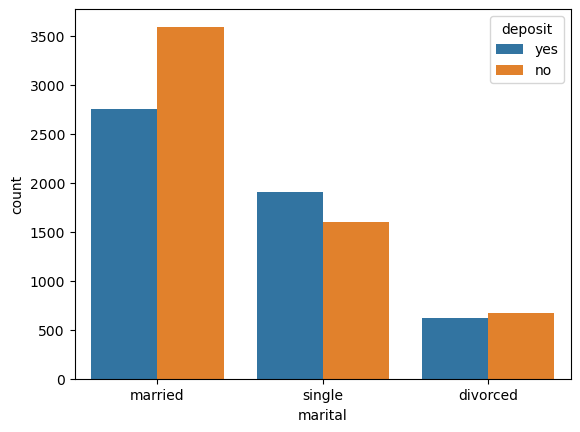

In [22]:
sns.countplot(x = 'marital', hue = 'deposit', data = df)

In [23]:
# Insights : 
# Looking at the population distribution, Single people are more inclined to Deposit Scheme. 
# Based on the trend, Single people should be targetted strategically through campaigns, to influence for the Deposit scheme. 
#

# Among the married people, more people are choosing against the deposit scheme. 
# Their choices may be influenced because of more family responsibility and liabilities, leaving less capacity to tie up in deposit. 
# Recommendation to explore further to identify the concerns or reasons for them not choosing the deposit scheme.

# Among divorced couples, the data distribution is nearly similar for both options. 
# They should be equally focussed and targetted through campaign to convert into business.

In [24]:
# KPI 4: Analysis of Education vs Deposit. 
# Education is categorical and Deposit is categorical
# Countplot  -- used for two categorical variable

In [25]:
df.education.value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [26]:
# The bulk of data is among secondary education category. These types of people may have been approached more through campaigns.

# The primary education sector is much lower as compared to secondary and tertiary. 

# Study and analyse the population distribution and their preferences for Deposit scheme, based on education.

# If Primary population is more lucrative for deposit scheme.
# Campaigns should be planned to target more primary educated people for the success of campaign. 

<Axes: xlabel='education', ylabel='count'>

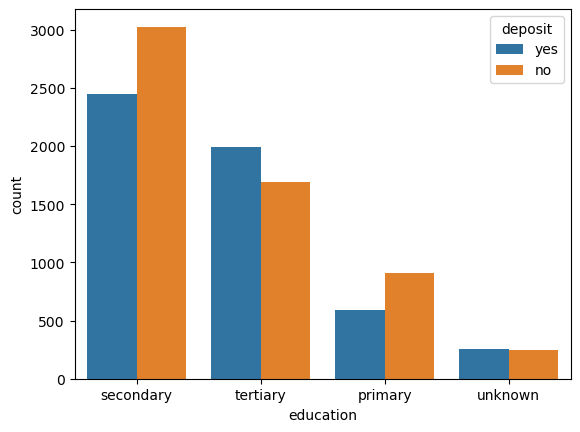

In [27]:
sns.countplot(x = 'education', hue = 'deposit', data = df)

In [28]:
# Insights : 
# Among primary & Secondary sector, people are more inclined towards No deposit scheme. 
# There is a substantial amount of population in Primary and secondary education sector, who have not opted for deposit scheme. 

# Among tertiary education sector, although more people have taken the deposit policy, we still have huge number of people against the policy.

# Previous campaign were not successful enough to convince/influence majority of the population towards the scheme.

# Marketing strategies need to be revised and explored further to improve campaign performance. 


In [29]:
# KPI 5: Analysis of Default vs Deposit. 
# Default is categorical and Deposit is categorical
# Countplot  -- used for two categorical variable

In [30]:
df.default.value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [31]:
# The bulk data has default 'no', which is good as for business, target audience should not have default = yes
# Campaign strategies needs to be planned to make it successful and bring more business from non default segment


<Axes: xlabel='default', ylabel='count'>

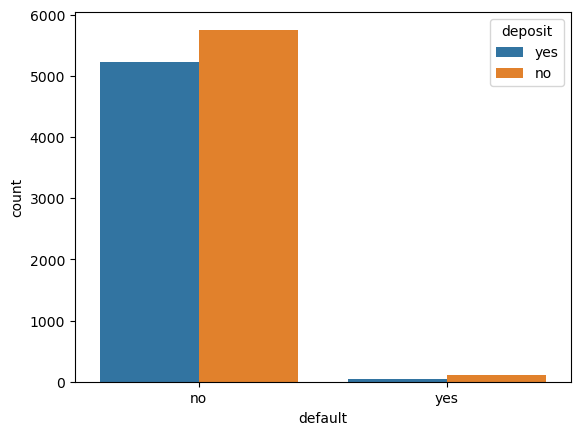

In [32]:
sns.countplot(x = 'default', hue = 'deposit', data = df)

In [33]:
#Insights: 

# Data distribution is nearly similar for / against Deposit scheme (with a small difference in non defaulters)
# Among non defaulters, people opting against deposit is slightly higher than the ones opting for the scheme. 

# Campaign strategies needs to be planned to make it successful and bring more business from non default segment


In [34]:
# KPI 6: Analysis of Balance vs Deposit. 
# Balance is continuous and Deposit is categorical
# Boxplot  -- used for one continuous and one categorical variable

In [35]:
df.balance.value_counts()

balance
 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: count, Length: 3805, dtype: int64

<Axes: xlabel='deposit', ylabel='balance'>

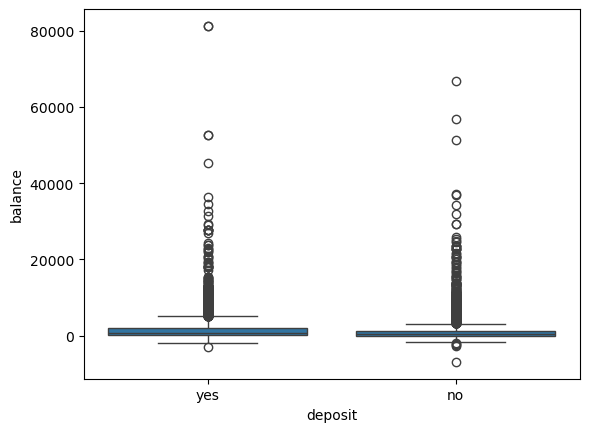

In [36]:
sns.boxplot(x = 'deposit', y = 'balance', data = df)

In [37]:
# Insights:

# The iqr of people opting for deposit scheme is more in comparision to people choosing no deposit scheme.
# However,the median look same for both the sector.
# The max balance is higher with the population from Yes category than from those in No category. 
# Meaning, the population with lower balance are not very much interested into deposit scheme. 
# There are more outliers under 'No' category. Meaning, even if people have high balance amount, they are not showing interest in the scheme.
# This shows, the past campaigns were not successful enough to convince/influence majority of the population towards the scheme.
# Marketing strategies need to be revised and explored further to improve campaign performance. 

In [38]:
# KPI 7: Analysis of Balance vs Housing & deposit. 
# Balance is continuous and Housing is categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [39]:
df.housing.value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [40]:
# The data distribution is nearly balanced. 

<Axes: xlabel='housing', ylabel='balance'>

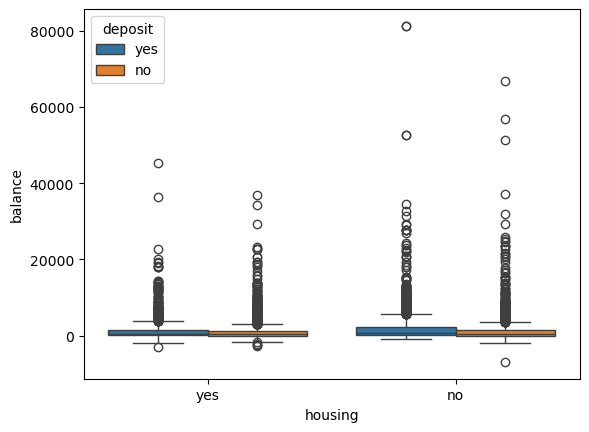

In [41]:
sns.boxplot(x = 'housing' , y = 'balance', hue = 'deposit', data = df)

In [42]:
# Insights:

# Even from the population that has housing loan,there is nearly equal distribution for/against the deposit scheme.
# People, despite the housing loan, have taken deposit scheme. 
# Hence, the Campaign should consider these people and continue targeting them strategically to convert more such people into the scheme.

# some people do not have housing loan as well as having high balance, still they have not taken deposit scheme. 
# Campaign should improve strategies to address their concerns and bring them into the policy.

# If people have balance and capacity, housing loan is not playing much role in deciding for the deposit scheme as the trends are similar. 

In [43]:
# KPI 8: Analysis of Balance vs loan & deposit. 
# Balance is continuous and loan is categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [44]:
df.loan.value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [45]:
# The bulk data has loan 'no', which is good as for business, we can target these people. 
# Since people having loan already may have reduced capacity to invest further into deposit scheme. 

<Axes: xlabel='loan', ylabel='balance'>

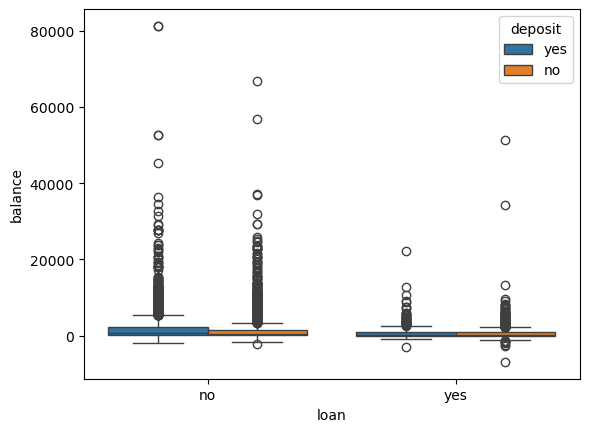

In [46]:
sns.boxplot(x = 'loan', y = 'balance', hue = 'deposit', data = df)

In [47]:
# Insights : 

# Even from the population that has loan,there is nearly equal distribution for/against the deposit scheme.
# People, despite the loan, have taken deposit scheme. 
# Hence, the Campaign should consider these people and continue targeting them strategically to convert more such people into the scheme.

# some people do not have loan as well as having high balance, still they have not taken deposit scheme. 
# Campaign should improve strategies to address their concerns and bring them into the policy.

# If people have balance and capacity, loan is not playing much role in deciding for the deposit scheme as the trends are similar. 

In [48]:
# KPI 9: Analysis of day & deposit. 
# day is continuous and deposit is categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [49]:
df.day.value_counts()

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='day'>

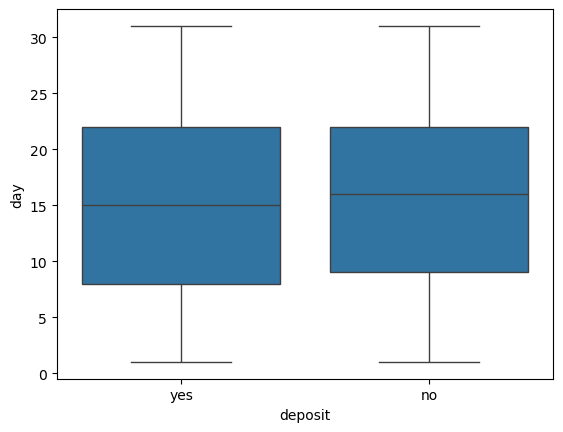

In [50]:
sns.boxplot(x = 'deposit', y = 'day', data = df)

In [51]:
# Insights : 

# Bulk poplutaion (decided for /against deposit scheme) was contacted in 2nd and 3rd week of the month.
# Central spread of the data opting Deposit scheme is more than that declining it. 

# The median of the population choosing Yes is around mid month, i.e 15th 
# It has been observed that 2nd and 3rd week are good for campaign to influence the population.

In [52]:
# KPI 10: Analysis of duration & deposit & job. 
# duration is continuous and deposit  & job is categorical
# Boxplot  -- used for one continuous  and one categorical variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

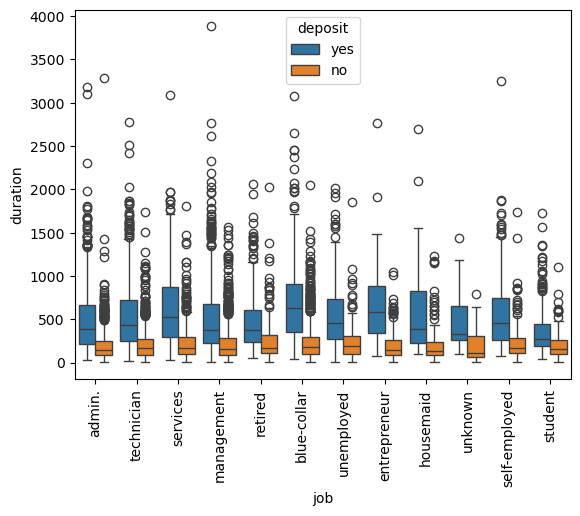

In [53]:
sns.boxplot(x = 'job', y = 'duration', hue = 'deposit',  data = df)
plt.xticks(rotation=90)  # Rotate the x-axis labels to display them vertically

In [54]:
# Insights : 

# The trend has been observed, the calls that went longer has turned positive outcome and convinced people for deposit

# The average duration of the calls for people not choosing the deposit scheme is comparitively low. 
# There are outliers in 'No', that shows some people have attended longer calls but still didn't get convinced to deposit.
# This population looks strong determined with their decision and business calls(shorter) were unable to influence them.
# Buisness needs to improve call strategies and explore more marketing schemes to make future campaigns impactful


In [55]:
# KPI 11: Analysis of campaign & deposit. 
# campaign is continuous and deposit categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [56]:
df.campaign.value_counts()

campaign
1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='campaign'>

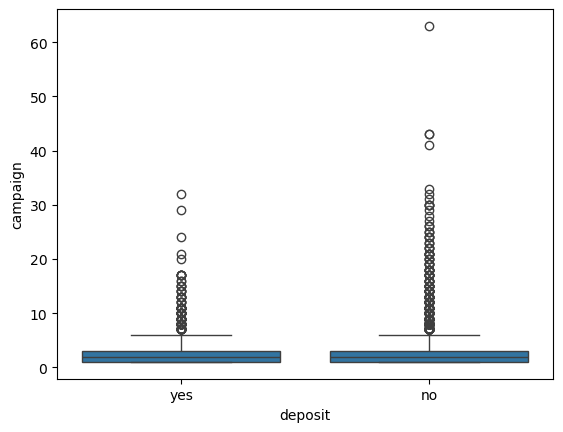

In [57]:
sns.boxplot(x = 'deposit', y = 'campaign', data = df)

In [58]:
# Insights:

# The IQR distribution for Yes/No population is similar.
# Trends shows people have decided fairly quickly(within 2-4 campaigns) whether they will be opting in or out for deposit.
# Outliers shows people were contacted/included in multiple campaigns (ranging upto 30) and still their decision were No. 
# Marketing campaigns should target their audience wisely. 
# The people sticking to 'No' decision after a certain number (say 10), the business should mark them 'Not INTERESTED' category and stop calling them. 


In [59]:
# KPI 12: Analysis of pdays & deposit. 
# pdays is continuous and deposit categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [60]:
df.pdays.value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

<Axes: xlabel='deposit', ylabel='pdays'>

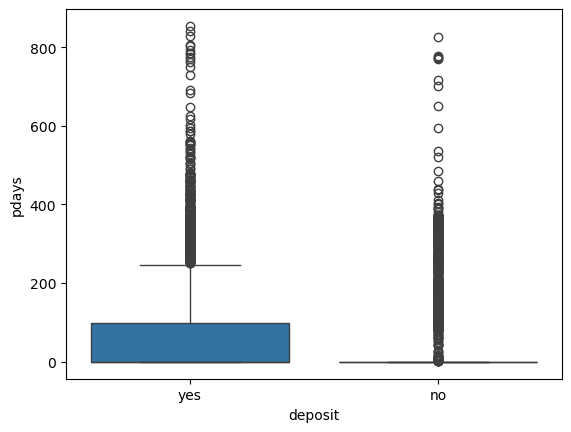

In [61]:
sns.boxplot(x = 'deposit', y = 'pdays', data = df)

In [62]:
# Insights:

# Bulk of the population choosing Yes for deposit scheme are those that were contacted again within 100 days after a previous campaign ended.
# However,outliers shows that some people got in Deposit scheme by contacting people after huge gap(  > 300 days)
# Some people remained against deposit scheme even approached regularly after previous campaign. 
# Such people have strong opinion made and business should mark them 'Not INTERESTED' category and stop calling them. 



In [63]:
# KPI 13: Analysis of previous & deposit. 
# previous is continuous and deposit categorical
# Boxplot  -- used for one continuous  and one categorical variable

In [64]:
df.previous.value_counts()

previous
0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='previous'>

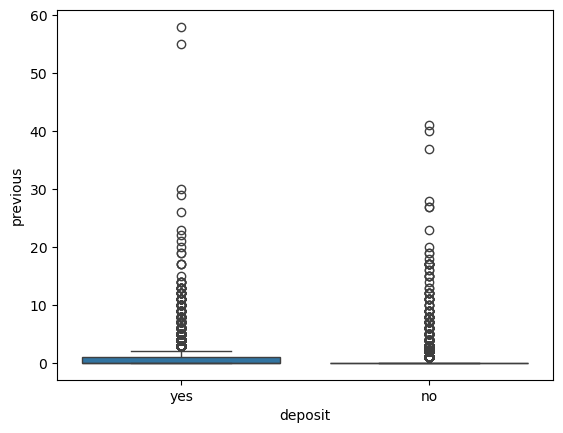

In [65]:
sns.boxplot(x = 'deposit', y = 'previous', data = df)

In [66]:
# Insights:

# Bulk of the population choosing Yes for deposit scheme are those that were contacted fewer times earlier before current campaign.
# However,outliers shows that some people got in Deposit scheme, were contacted many times previously as well before the campaign. 
# This shows, campaign was marginally successful to bring few people into the deposit scheme by repetitive calling. 
# Very low amount of people choosing 'No' for deposit are amonth those who were either never or very few times contacted previously before this campaign. 
# For the higher number of previous contacts, the decision of people remained unchanged i.e 'No', 
# so business may consider them 'Not INTERESTED' category and stop calling them.


In [67]:
# KPI 14: Analysis of poutcome & deposit. 
# poutcome is categorical and deposit categorical
# Countplot  -- used for one continuous  and one categorical variable

In [68]:
df.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

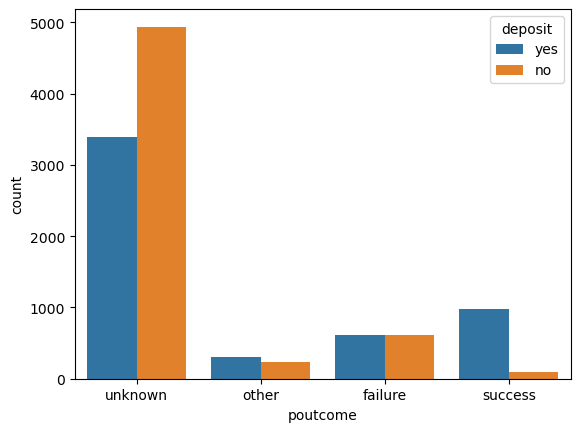

In [69]:
sns.countplot(x = 'poutcome', hue = 'deposit', data = df)

In [70]:
# Insights: 

# Distribution of Deposit Yes is higher than No under Success category. This means, Previous campaign success ratio is quite high.

# Distribution of Deposit for/against is equal under failure category. 
# Even if the campaign was a failure, the population for opting in and out deposit scheme was similar ratio.

# For the unknown outcome of the previous campaign, more people were declining the deposit scheme than opting for it. 

# Overall, marketing team needs to device better campaigns to improe the performance.  


In [71]:
# Overall Insights : 
# In this project, the dependent variable was analysed individually with each of the independent variable of the dataset.
# Various statistical observations were made and visualization charts were developed. 
# On analysing the past trends, it has been observed that camapigns were successful with small percentage. 
# Previous campaigns have not drawn a massive customer base towards the deposit scheme. 
# There may be issues in not targeting the right customer demographics, or not offering the best deals to customers. 
# There could be a need of improvement in how the customers are approached and 
# if the customer care staff needs retraining to identify issues and improve marketing communication. 
# The business team needs to do further analysis of similar deposit schemes available in market and identify the selling points missing from the scheme. 
